# Basic example of latticeproteins

Import the latticeproteins package.

In [1]:
import latticeproteins as lp

The `LatticeThermodyanmics` class creates objects that can calculate lattice protein thermodynamics for any sequences of a specified length. In the example below, we initialize this object for sequences of length 10. Note that to avoid repeating expensive conformation enumerations, the `LatticeThermodynamics` object creates a directory in your current location called `database`. Inside this directory, it stores python `pickle` files that include a database of all conformations on a 2d grid.

In [2]:
seq_length = 10
temperature = 1.0
lattice = lp.LatticeThermodynamics.from_length(seq_length, 1.0)

Now, we'll create a random sequence with the given length and start evaluating thermodynamic values.

In [3]:
seq = lp.random_sequence(seq_length)
print(seq)

['W', 'C', 'K', 'C', 'I', 'D', 'N', 'G', 'K', 'T']


In [4]:
print("Energy of native conformation: %f" % lattice.nativeE(seq))
print("stability of native conformation: %f" % lattice.stability(seq))
print("fraction folded: %f" % lattice.fracfolded(seq))

Energy of native conformation: -15.460000
stability of native conformation: 1.904670
fraction folded: 0.129581


The lattice protein package comes with a drawing module that creates SVG drawing of the lattice conformations.

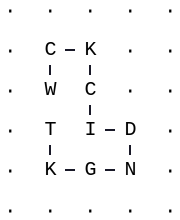

In [5]:
conf = lattice.native_conf(seq)
lp.draw.in_notebook(seq, conf)

## Fold lattice protein to nonnative state

The `LatticeThermodynamics` object can also do the above calculations while using a specified *target* native state. 

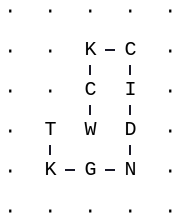

In [6]:
# Find the 5 lowest energy conformations.
alt_conf = lattice.confs.k_lowest_confs(seq, 1.0, 5)

# Choose the 5th lowest as the target fold.
target = alt_conf[-1]
lp.draw.in_notebook(seq, target)

In [7]:
print("Energy of native conformation: %f" % lattice.nativeE(seq, target=target))
print("stability of native conformation: %f" % lattice.stability(seq, target=target))
print("fraction folded: %f" % lattice.fracfolded(seq, target=target))

Energy of native conformation: -14.620000
stability of native conformation: 2.825883
fraction folded: 0.055941
